In [32]:
# Import libraries
import pandas as pd

## STEP 2: Download Data

### Global Historical Climatology Network

One way scientists know that the climate is changing is by looking at
records from temperature sensors around the globe. Some of these sensors
have been recording data for over a century! For this activity, we’ll
get daily maximum temperature measurements from the [Global Historical
Climate Network
daily](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily)
(Menne et al. 2012), an openly available and extensively validated
global network of temperature sensors.

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/a/ab/GHCN_Temperature_Stations.png"
alt="The Global Historical Climatology Network Source: CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2084097" />
<figcaption aria-hidden="true">The Global Historical Climatology Network
Source: CC BY-SA 3.0,
https://commons.wikimedia.org/w/index.php?curid=2084097</figcaption>
</figure>

The GHCNd data are available through by the National Oceanic and
Atmospheric Administration’s (NOAA) National Centers for Environmental
Information (NCEI) Climate Data Online [search
tool](https://www.ncdc.noaa.gov/cdo-web/search). We can get also get
these data using code by contacting NCEI’s API.

> **What’s an API?**
>
> An API, or Application Programming Interface, is how computers talk to
> each other.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Read more about <a
href="https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation">NCEI’s
API</a> and the <a href="https://www.ncei.noaa.gov/cdo-web/">Climate
Data Online</a> database.</p></div></div>

For this activity we have created URLs that contacts the NCEI API for
two climate stations in the greater Chicago area. We will walk through
each line of the url to explain what it is doing.

### O’Hare International Airport

Chicago O’Hare International Airport (ORD) is one of the busiest
airports in the world, serving as a major hub for both domestic and
international flights. Located about 14 miles northwest of downtown
Chicago, it offers flights to more than 200 destinations and handles
over 83 million passengers annually. It is home to Chicago’s official
meteorological station. It creates an urban heat island due to the
amount of concrete and asphalt needed to support the infrastructure.

**Station ID: USW00094846**

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Build your API URL</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Add the station ID for the O’Hare station (USW00094846) into the URL
below</li>
<li>Run the code to store the URL in Python</li>
</ol></div></div>

> **What if the API is down?**
>
> Getting data from APIs relies on internet services you don’t have
> control over. If you are getting a response something like
> `503: Service Unavailable`, it may be that the API is down
> temperarily! If that happens during the workshop, we’ll have you use
> some data we’ve already downloaded. That’s what `ohare_path` is for –
> with any luck we won’t need it.

In [33]:
ohare_id = 'USW00094846'
northerly_id = 'USC00111550'

In [34]:
# Create a URL API call for the O'Hare climate station
ohare_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    '&dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=ohare_id'
    '&startDate=2024-06-01'
    '&endDate=2024-06-30'
    '&units=standard')

# Path to local data file (Codespaces only)
ohare_path = 'ohare-temps.csv'

# Check the URL
ohare_url

'https://www.ncei.noaa.gov/access/services/data/v1?&dataset=daily-summaries&dataTypes=TMAX&stations=ohare_id&startDate=2024-06-01&endDate=2024-06-30&units=standard'

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load maximum temperature data for O'Hare</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>url_or_path</code> with the variable name you used
above to store the O’Hare station API URL (or O’Hare data path if the
API is down). Run the code to make sure you’ve got it right!</li>
<li>Uncomment lines 4 and 5. Then, replace <code>date_column_name</code>
with the actual column name that has the date.</li>
<li>Run the code, again. Check that the date column is the
<strong>index</strong> and that it is parsed into a
<code>DateTimeIndex</code> using the <code>.describe()</code>
method.</li>
</ol></div></div>

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX
DATE,,,,,,
2024-06-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,68
2024-06-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,77
2024-06-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,86
2024-06-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,85
2024-06-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96017,-87.93164,204.8,79


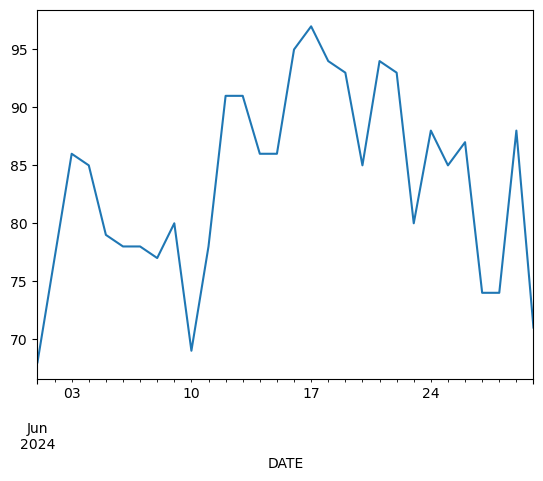

In [35]:
# Open data using pandas
ohare_df = pd.read_csv(
    ohare_path,
    parse_dates=True,
    index_col='DATE'
)

# Plot the data using pandas
ohare_df.TMAX.plot()

# Check the first 5 lines of data
ohare_df.head()

<h1>Northerly Island</h2>
Northerly Island is a 91-acre man-made peninsula located along the Lake
Michigan shoreline in Chicago. Originally part of Daniel Burnhams 1909
Plan of Chicago, it was transformed into a nature-focused park featuring
walking trails, natural habitats, and scenic lakefront views. The site
also hosts the Huntington Bank Pavilion, a popular outdoor concert
venue.
</div
<link rel="stylesheet" type="text/css" href="./assets/styles.css">
<div class="callout callout-style-default callout-titled callout-task">
<div class="callout-header"><div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">Try It: Load data, part 2</div>
</div><div class="callout-body-container callout-body">
<ol type="1">
<li>Repeat the above data loading process using the Northerly Island
site (<strong>Station ID: USC00111550</strong>)</li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="8">
<div data-__quarto_custom_scaffold="true">
Make sure to give your new variables different names!
</div>
<div data-__quarto_custom_scaffold="true">
<p>e.g. <code>northerly_url</code> instead of <code>ohare_url</code>.
Otherwise, you will write over the data you just downloaded!</p>
</div>
</div></div></div>

In [36]:
# Create an API call for the Northerly climate station
northerly_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1?'
    'dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=northerly_id'
    '&startDate=2024-06-01'
    '&endDate=2024-06-30'
    '&units=standard')

# Path to local data file (Codespaces only)
northerly_path = 'northerly-temps.csv'

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX
DATE,,,,,,
2024-06-01,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,67
2024-06-02,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,67
2024-06-03,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,85
2024-06-04,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,77
2024-06-05,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,79


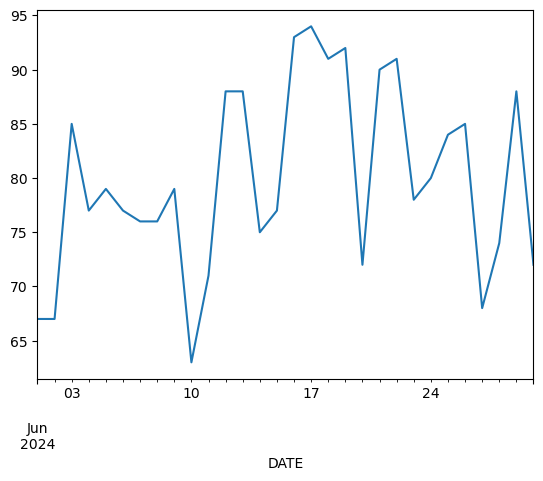

In [37]:
# Open data
nor_df = pd.read_csv(
    northerly_path,
    parse_dates=True,
    index_col='DATE'
)

# Plot the data using pandas
nor_df.TMAX.plot()

# Check the first 5 lines of data
nor_df.head()

## STEP 3: Wrangle Data

### Select only the columns you want

Notice that your data came with a `STATION` column as well as the
maximum temperature `TMAX` column. The extra column can make your data a
bit unweildy.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>To select only the <code>TMAX</code> column:</p>
<ol type="1">
<li>Replace <code>df</code> with the name of your
<code>DataFrame</code></li>
<li>Replace <code>column_name</code> with the name of the column you
want to select</li>
<li>Replace <code>tmax_df</code> in all locations with a descriptive
name for the new single-column <code>DataFrame</code></li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="11">
<div data-__quarto_custom_scaffold="true">
What’s with those double square brackets? (<code>[[]]</code>)
</div>
<div data-__quarto_custom_scaffold="true">
<p>If you use single brackets, you will find that you get back something
called a <code>Series</code> rather than a <code>DataFrame</code>, which
will make things difficult down the road. A <code>Series</code> is a
single column of a <code>DataFrame</code>. It still has an index (in
this case our dates), but can’t do all the things a
<code>DataFrame</code> can do. It also displays as plain text instead of
a formatted table, so you can easily tell the difference.</p>
</div>
</div></div></div>

In [38]:
# Select only the TMAX column of the O'Hare data
tmax_df = ohare_df[['TMAX']]
tmax_df.describe()

,TMAX
count,30.000000
mean,83.566667
std,8.122694
min,68.000000
25%,78.000000
50%,85.000000
75%,90.250000
max,97.000000


In [39]:
# Select only the TMAX column of the Northerly data
tmax_df = nor_df[['TMAX']]
tmax_df.describe()

,TMAX
count,30.000000
mean,79.900000
std,8.738934
min,63.000000
25%,74.250000
50%,78.500000
75%,88.000000
max,94.000000


### Join data

Right now, we have data from two stations in two separate `DataFrames`.
We could work with that, but to make things go smoother (and learn how
to work with `DataFrames`) we can **join** them together.

> **What’s a **join**?**
>
> There are a few different ways to combine `DataFrame`s in Python. A
> **join** combines two `DataFrame`s by their **index** (the dates in
> our case), checking to make sure that every date matches. In our case,
> we could **concatenate** instead without checking the dates, because
> all the dates are the same for our two `DataFrame`s. That would
> probably be faster! But also, we think it is more error-prone. For
> example, it might not tell you that something was wrong if you
> accidentally downloaded data from two different years.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Join two `DataFrame`s</div></div><div class="callout-body-container callout-body"><p>Starting with the sample code below:</p>
<ol type="1">
<li>Replace <code>left_df</code> with the name of the first
<code>DataFrame</code>. In this case, it doesn’t matter which one you
choose to be on the left, but you need to make sure that it matches the
<strong>left suffix</strong> label (<code>lsuffix</code>).</li>
<li>Replace <code>right_df</code> with the name of the second
<code>DataFrame</code>, making sure it matches
<code>rsuffix</code>.</li>
<li>Run the code and check that your join happened correctly.</li>
</ol></div></div>

<Axes: xlabel='DATE'>

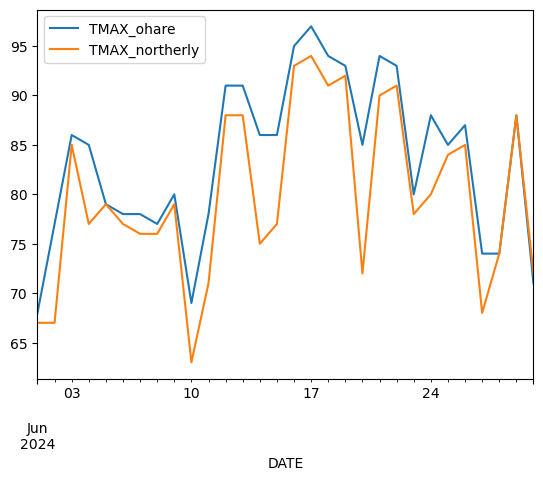

In [42]:
# Join the data
tmax_df = (
    ohare_df[['TMAX']]
    .join(
        nor_df[['TMAX']], 
        lsuffix='_ohare', 
        rsuffix='_northerly')
)
tmax_df.head()
tmax_df.plot()

In [41]:
%store tmax_df

Stored 'tmax_df' (DataFrame)


Menne, Matthew J., Imke Durre, Russell S. Vose, Byron E. Gleason, and
Tamara G. Houston. 2012. “An Overview of the Global Historical
Climatology Network-Daily Database.” *Journal of Atmospheric and Oceanic
Technology* 29 (7): 897–910.
<https://doi.org/10.1175/JTECH-D-11-00103.1>.